In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [8]:
df = pd.read_csv('/kaggle/input/tractor-dataset/df_022C4097_v2.csv', sep=',')
df = df.drop('Unnamed: 0', axis=1)

In [14]:
df.head()

,Дата и время,"Полож.пед.акселер.,%","Давл.масла двиг.,кПа","Темп.масла двиг.,°С","Обор.двиг.,об/мин","Значение счетчика моточасов, час:мин",Сост.пед.сцепл.,КПП. Температура масла,КПП. Давление масла в системе смазки,Скорость,...,Аварийное давление в II контуре тормозной системы (spn3855),Зарядка АКБ (spn3854),Отопитель (spn3853),Выход блока управления двигателем (spn3852),Включение тормозков (spn3859),Засоренность фильтра слива (spn3858),Аварийная температура масла ДВС(spn3856),Низкий уровень ОЖ (spn3860),Аварийная температура масла ГТР (spn3867),Подогрев топливного фильтра (spn3865)
0,01/06/2023 07:57:31,0.0,380,-273.0,649.000,422:24,Отпущ.,-273,1184,0.0,...,0,0,0,0,0,0,0,0,0,0
1,01/06/2023 07:58:01,0.0,360,-273.0,651.000,422:24,Отпущ.,-273,1200,0.0,...,0,0,0,0,0,0,0,0,0,0
2,01/06/2023 07:58:31,0.0,348,-273.0,656.000,422:24,Отпущ.,-273,1200,0.0,...,0,0,0,0,0,0,0,0,0,0
3,01/06/2023 07:59:01,0.0,360,-273.0,671.875,422:24,Отпущ.,-273,1200,0.0,...,0,0,0,0,0,0,0,0,0,0
4,01/06/2023 07:59:31,0.0,328,-273.0,649.625,422:24,Отпущ.,-273,1200,0.0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df.describe()

,"Полож.пед.акселер.,%","Давл.масла двиг.,кПа","Темп.масла двиг.,°С","Обор.двиг.,об/мин",КПП. Температура масла,КПП. Давление масла в системе смазки,Скорость,ДВС. Давление смазки,ДВС. Температура охлаждающей жидкости,"Давление в пневмостистеме (spn46), кПа",...,Аварийное давление в II контуре тормозной системы (spn3855),Зарядка АКБ (spn3854),Отопитель (spn3853),Выход блока управления двигателем (spn3852),Включение тормозков (spn3859),Засоренность фильтра слива (spn3858),Аварийная температура масла ДВС(spn3856),Низкий уровень ОЖ (spn3860),Аварийная температура масла ГТР (spn3867),Подогрев топливного фильтра (spn3865)
count,18144.000000,18144.000000,18144.0,18144.000000,18144.0,18144.000000,18144.000000,18144.000000,18144.000000,18144.000000,...,18144.000000,18144.000000,18144.0,18144.0,18144.0,18144.0,18144.0,18144.0,18144.0,18144.0
mean,53.306195,331.540564,-273.0,1364.610264,-273.0,1160.154321,5.493155,331.540785,80.328153,771.115961,...,0.000606,0.003748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,31.991788,113.878943,0.0,401.920430,0.0,123.678143,5.507362,113.878731,8.255825,47.873962,...,0.024616,0.061106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,-273.0,0.000000,-273.0,0.000000,0.000000,0.000000,21.000000,448.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,25.100000,260.000000,-273.0,1057.250000,-273.0,1152.000000,0.000000,260.000000,81.000000,768.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,71.600000,380.000000,-273.0,1580.375000,-273.0,1168.000000,6.100000,380.000000,83.000000,784.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,77.600000,408.000000,-273.0,1663.375000,-273.0,1200.000000,10.800000,408.000000,83.000000,784.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,92.000000,568.000000,-273.0,1881.000000,-273.0,1264.000000,19.000000,568.000000,88.000000,816.000000,...,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18144 entries, 0 to 18143
Data columns (total 37 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Дата и время                                                 18144 non-null  object 
 1   Полож.пед.акселер.,%                                         18144 non-null  float64
 2   Давл.масла двиг.,кПа                                         18144 non-null  int64  
 3   Темп.масла двиг.,°С                                          18144 non-null  float64
 4   Обор.двиг.,об/мин                                            18144 non-null  float64
 5   Значение счетчика моточасов, час:мин                         18144 non-null  object 
 6   Сост.пед.сцепл.                                              18144 non-null  object 
 7   КПП. Температура масла                                       18144 non-null 

In [18]:
df.isnull().sum()

Дата и время                                                   0
Полож.пед.акселер.,%                                           0
Давл.масла двиг.,кПа                                           0
Темп.масла двиг.,°С                                            0
Обор.двиг.,об/мин                                              0
Значение счетчика моточасов, час:мин                           0
Сост.пед.сцепл.                                                0
КПП. Температура масла                                         0
КПП. Давление масла в системе смазки                           0
Скорость                                                       0
ДВС. Давление смазки                                           0
ДВС. Температура охлаждающей жидкости                          0
Давление в пневмостистеме (spn46), кПа                         0
Электросистема. Напряжение                                     0
ДВС. Частота вращения коленчатого вала                         0
Нейтраль КПП (spn3843)   

In [20]:
anomaly = pd.read_csv('/kaggle/input/tractor-dataset/data/data/��� �������/dataset._anomaly.csv', sep=';')
normal = pd.read_csv('/kaggle/input/tractor-dataset/data/data/��� �������/dataset._normal.csv', sep=';')
problems = pd.read_csv('/kaggle/input/tractor-dataset/data/data/��� �������/dataset._problems.csv', sep=';')

/tmp/ipykernel_34/3687640410.py:2: DtypeWarning: Columns (3,12,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  normal = pd.read_csv('/kaggle/input/tractor-dataset/data/data/��� �������/dataset._normal.csv', sep=';')
/tmp/ipykernel_34/3687640410.py:3: DtypeWarning: Columns (3,11,12,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  problems = pd.read_csv('/kaggle/input/tractor-dataset/data/data/��� �������/dataset._problems.csv', sep=';')


In [5]:
cat = ['Значение счетчика моточасов, час:мин',   'Сост.пед.сцепл.']

In [12]:
df['Темп.масла двиг.,°С'] = df['Темп.масла двиг.,°С'].str.replace(',', '.').astype('float')
df['Обор.двиг.,об/мин'] = df['Обор.двиг.,об/мин'].str.replace(',', '.').astype('float')
df['Полож.пед.акселер.,%'] = df['Полож.пед.акселер.,%'].str.replace(',', '.').astype('float')

/opt/conda/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


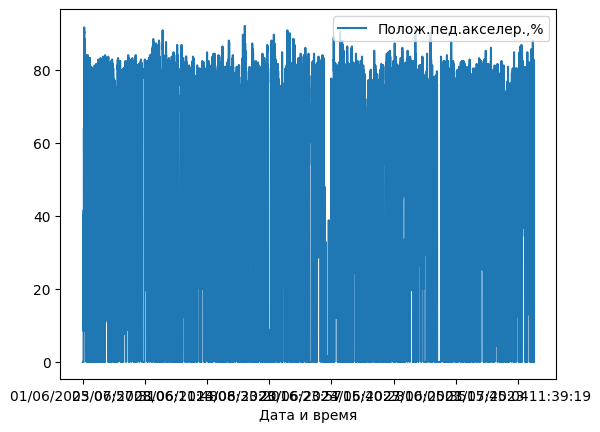

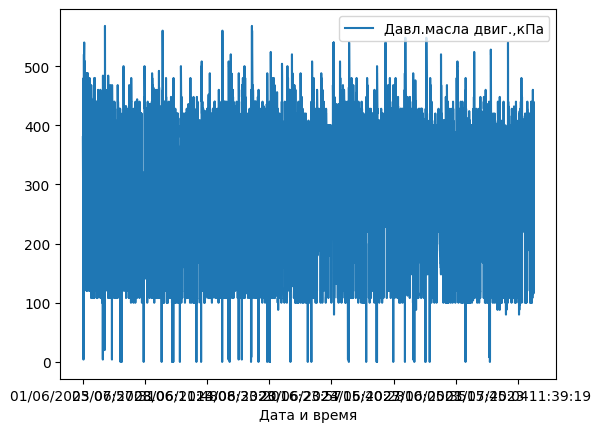

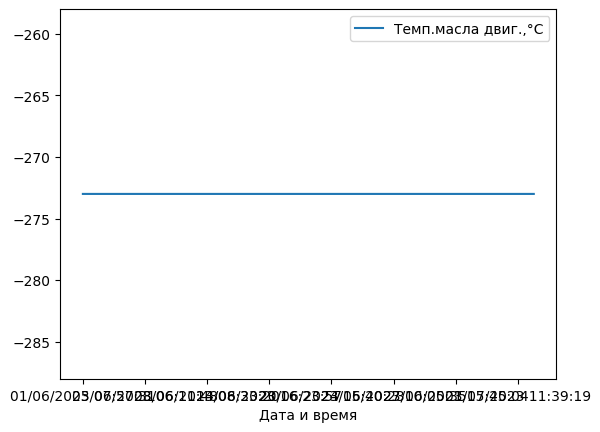

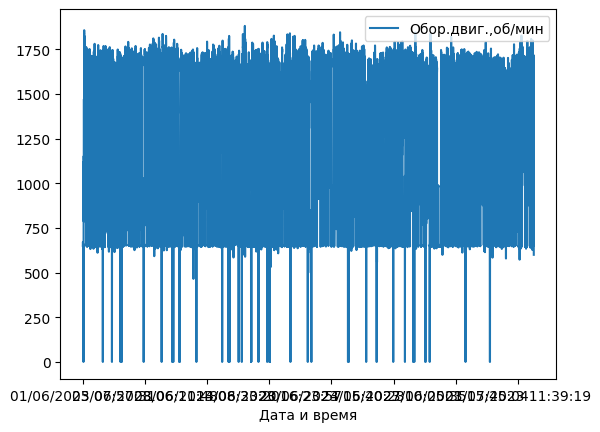

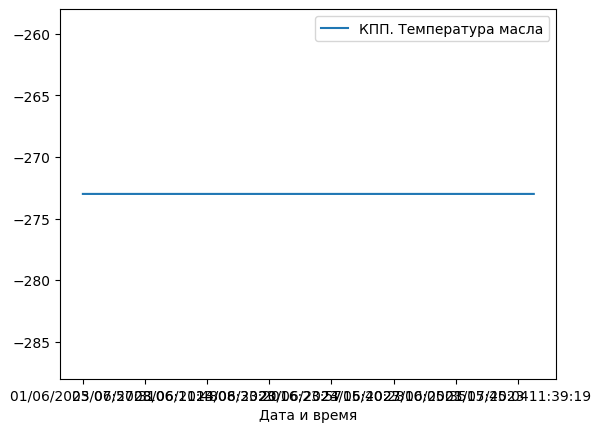

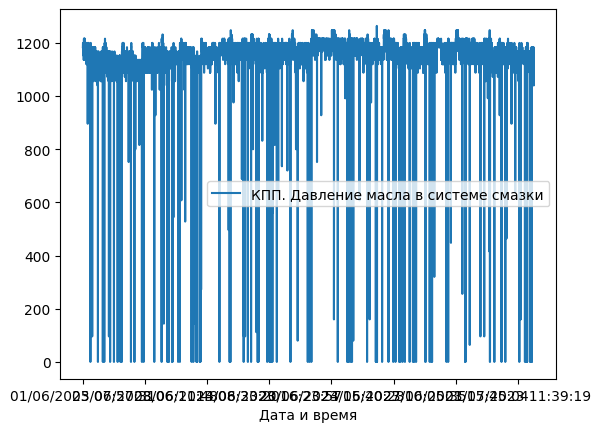

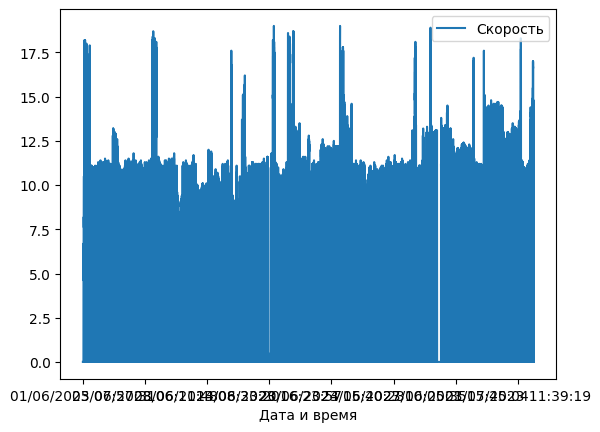

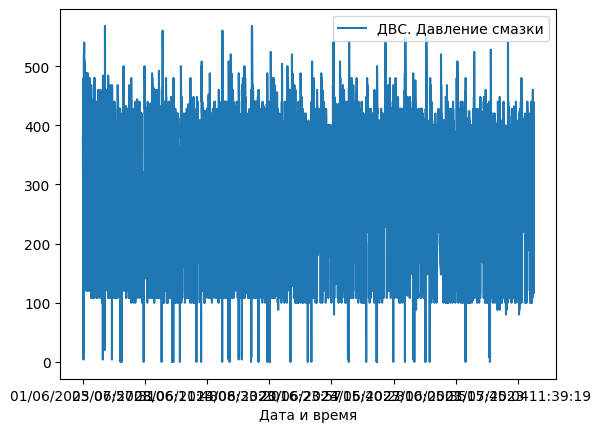

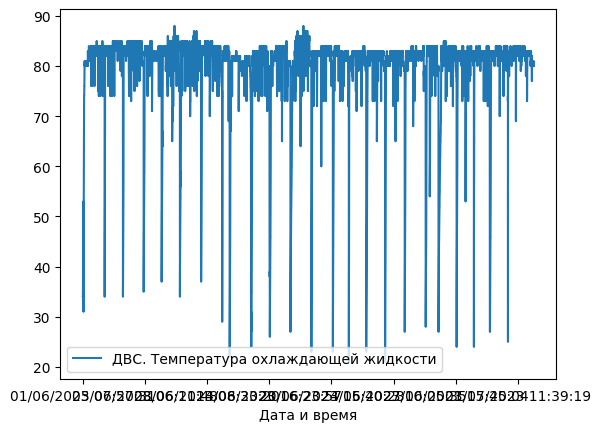

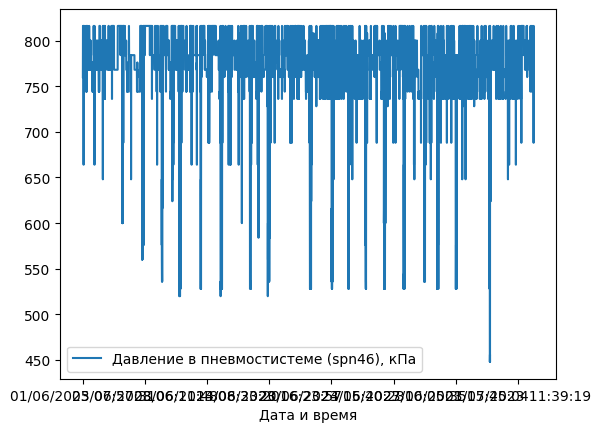

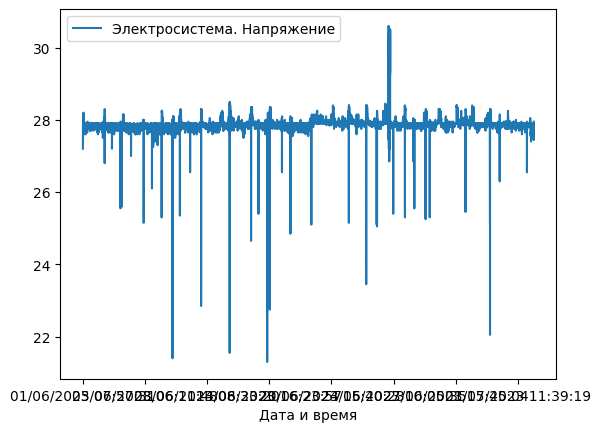

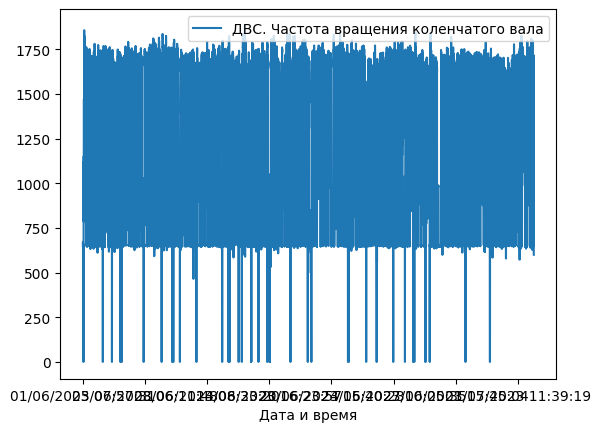

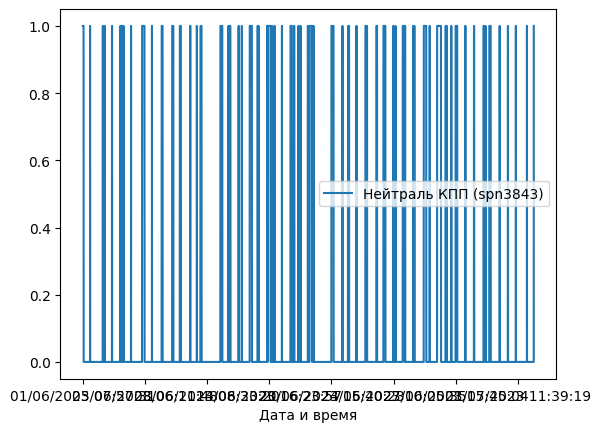

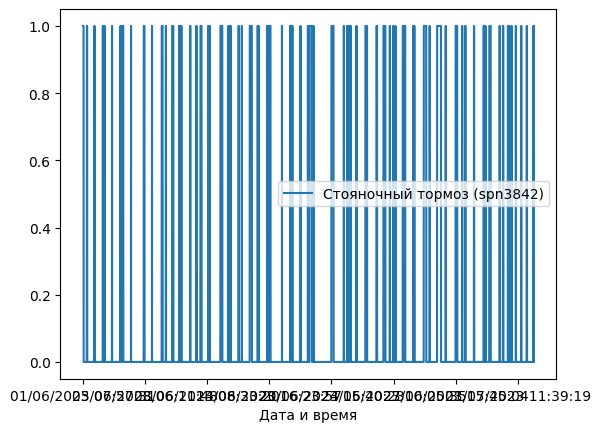

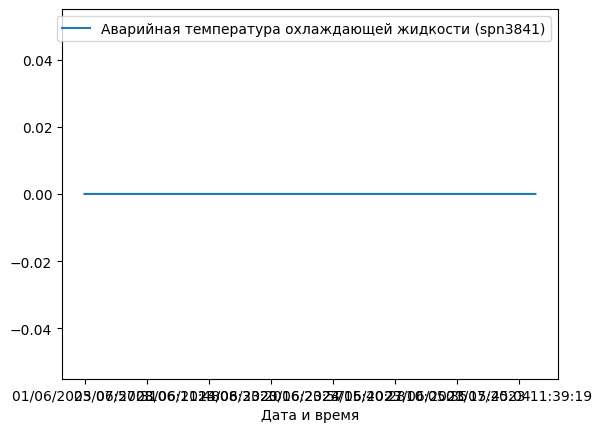

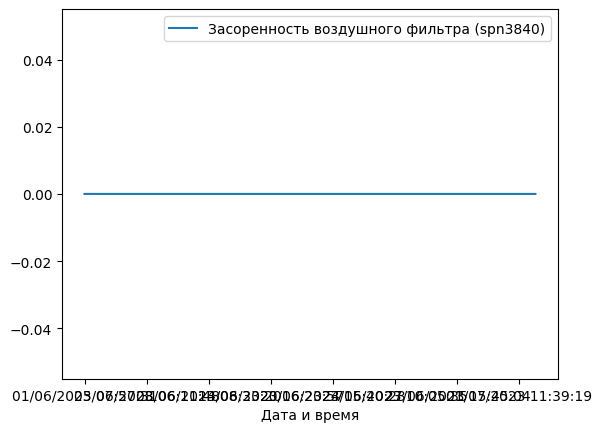

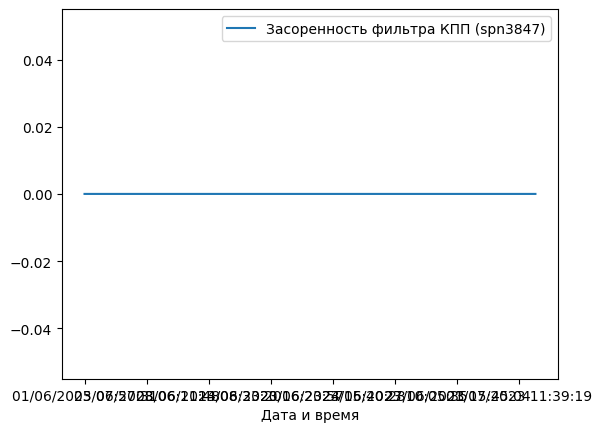

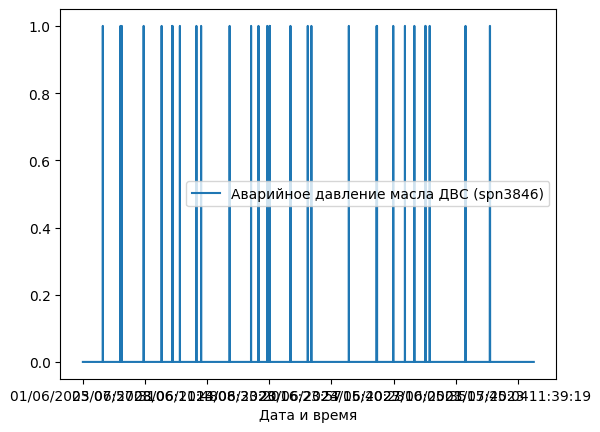

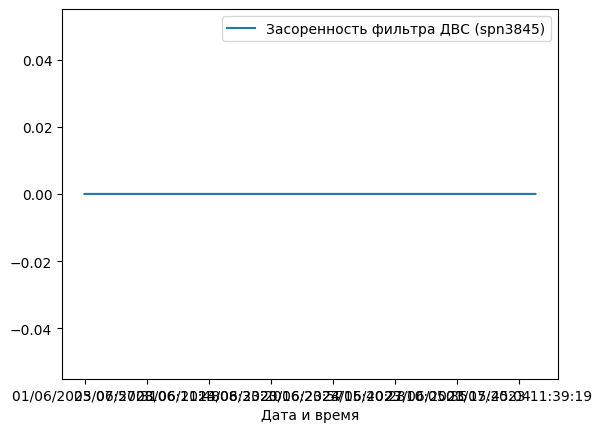

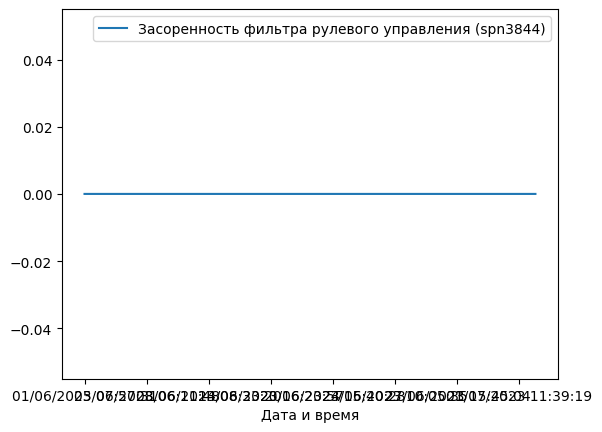

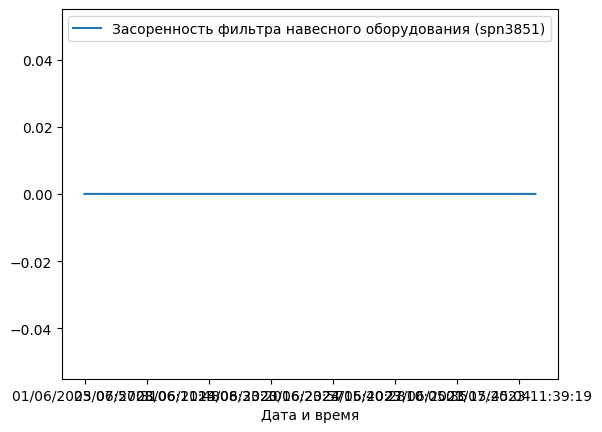

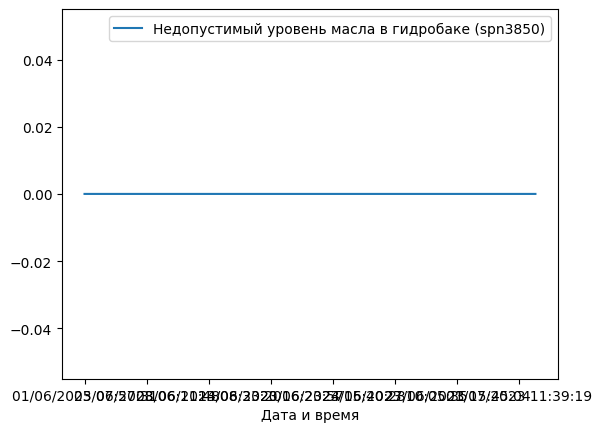

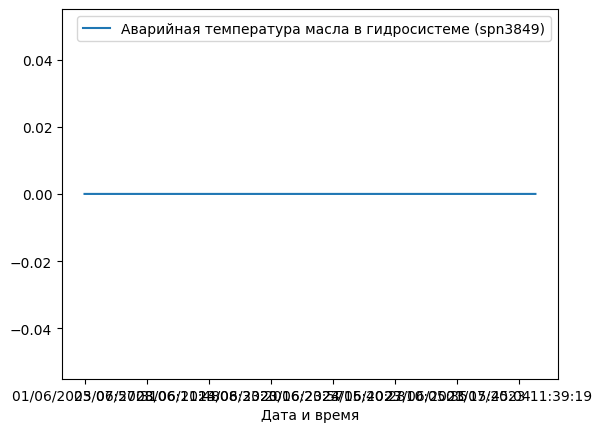

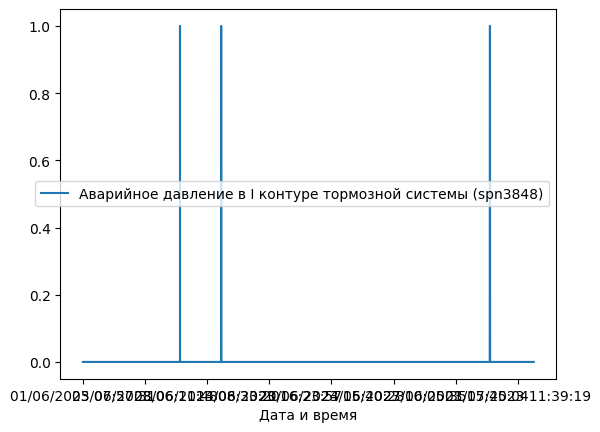

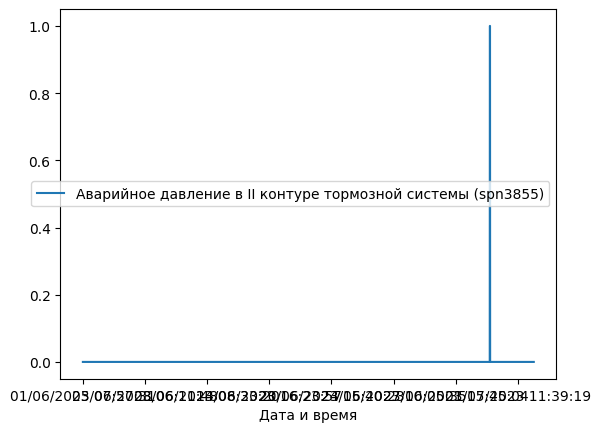

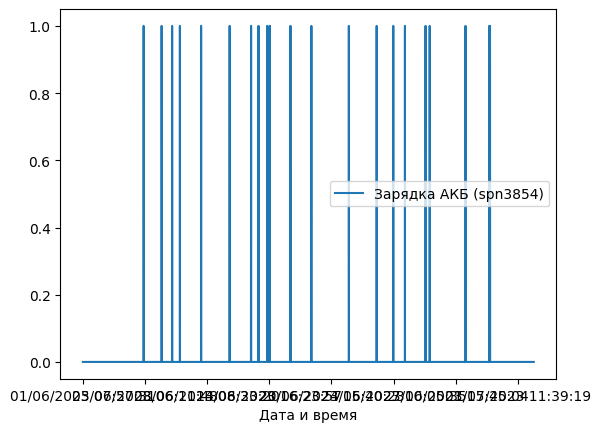

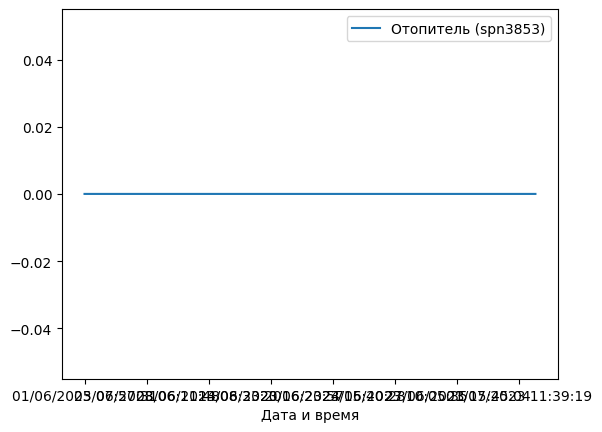

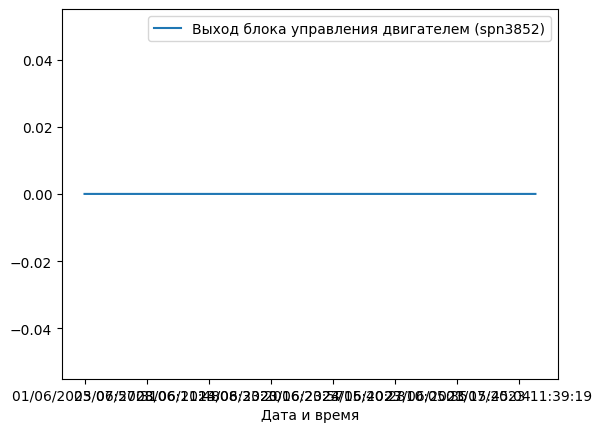

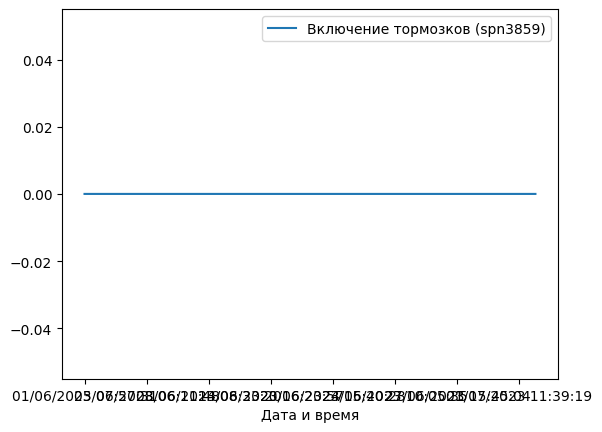

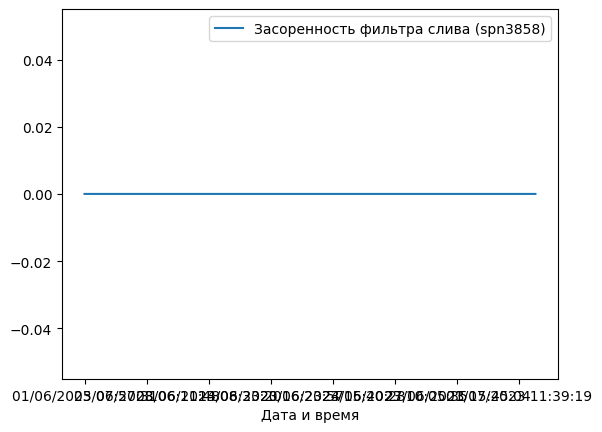

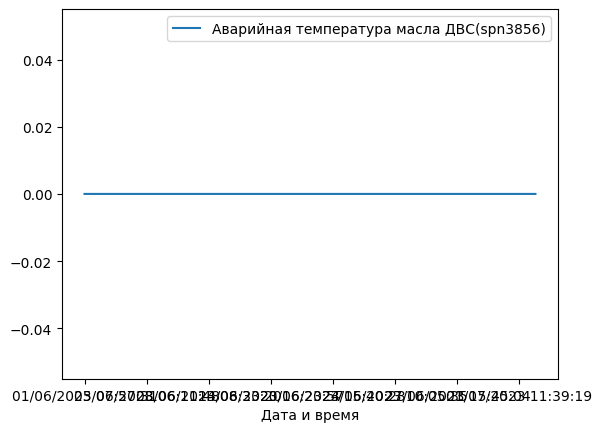

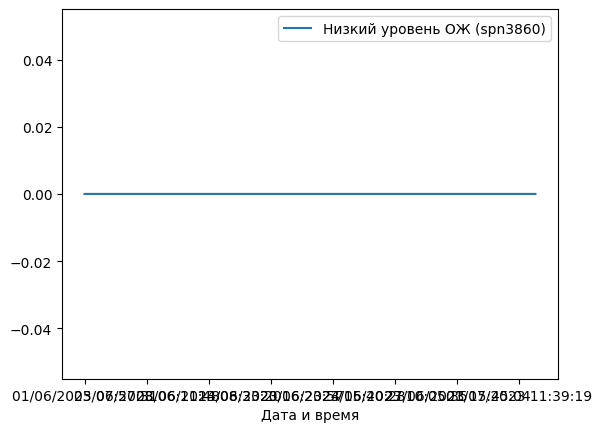

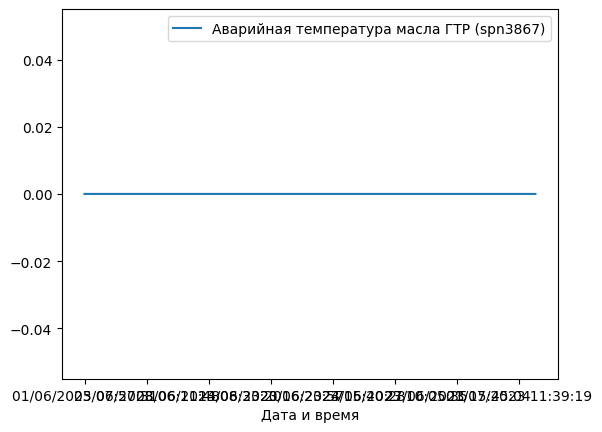

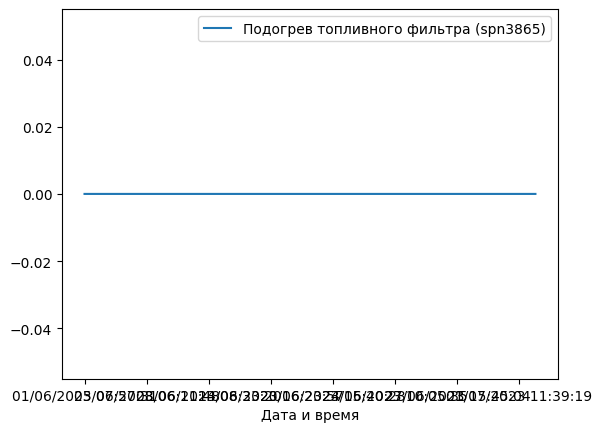

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = df.columns.tolist()
cols.pop(0)
cols = [x for x in cols if x not in cat]

for col in cols:
    df.plot(x='Дата и время', y=col)

In [21]:
anomaly.head()

,Дата и время,"Полож.пед.акселер.,%","Нагрузка на двигатель, %","Давл.масла двиг.,кПа","Темп.масла двиг.,°С","Обор.двиг.,об/мин","Значение счетчика моточасов, час:мин",Сост.пед.сцепл.,iButton2,КПП. Температура масла,...,Вода в топливе (spn3864),Холодный старт (spn3871),"Крутящий момент (spn513), Нм","Положение рейки ТНВД (spn51), %","Расход топлива (spn183), л/ч","ДВС. Температура наддувочного воздуха, °С","Давление наддувочного воздуха двигателя (spn106), кПа",Текущая передача (spn523),"Температура масла гидравлики (spn5536), С",Педаль слива (spn598)
0,19/05/2023 00:00:03,"7,0",-,488,59,"656,000",168:36,Отпущ.,NaN,-247,...,0,0,-,-,-,-,-,-,-,-
1,19/05/2023 00:00:33,"54,0",-,1171,77,"2424,000",168:36,Отпущ.,NaN,-9,...,0,0,-,-,-,-,-,-,-,-
2,19/05/2023 00:01:03,"6,0",-,721,168,"1151,000",168:36,Отпущ.,NaN,-127,...,0,0,-,-,-,-,-,-,-,-
3,19/05/2023 00:01:40,"91,0",-,779,75,"2324,000",168:36,Отпущ.,NaN,-178,...,0,0,-,-,-,-,-,-,-,-
4,19/05/2023 00:01:49,"59,0",-,718,181,"4658,000",-,-,NaN,-53,...,-,-,-,-,-,-,-,-,-,-


In [22]:
anomaly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189704 entries, 0 to 189703
Data columns (total 55 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   Дата и время                                                 189704 non-null  object 
 1   Полож.пед.акселер.,%                                         189704 non-null  object 
 2   Нагрузка на двигатель, %                                     189704 non-null  object 
 3   Давл.масла двиг.,кПа                                         189704 non-null  int64  
 4   Темп.масла двиг.,°С                                          189704 non-null  int64  
 5   Обор.двиг.,об/мин                                            189704 non-null  object 
 6   Значение счетчика моточасов, час:мин                         189704 non-null  object 
 7   Сост.пед.сцепл.                                              1897

In [23]:
anomaly.describe()

,"Давл.масла двиг.,кПа","Темп.масла двиг.,°С",iButton2,КПП. Температура масла,КПП. Давление масла в системе смазки,Скорость,ДВС. Давление смазки,ДВС. Температура охлаждающей жидкости,"Давление в пневмостистеме (spn46), кПа",Электросистема. Напряжение,ДВС. Частота вращения коленчатого вала
count,189704.000000,189704.000000,0.0,189704.000000,189704.000000,189704.000000,189704.000000,189704.000000,189704.000000,189704.000000,189704.000000
mean,749.398958,99.996784,NaN,-136.189131,1501.024601,18.483864,800.175136,80.588707,511.863456,12.475847,2498.067885
std,433.454565,57.959281,NaN,79.199258,867.499470,10.972940,462.660230,40.406482,282.498736,6.932189,1444.210027
min,0.000000,0.000000,NaN,-273.000000,0.000000,0.000000,0.000000,11.000000,24.000000,1.000000,0.000000
25%,373.000000,50.000000,NaN,-205.000000,750.000000,9.000000,399.000000,46.000000,266.000000,6.000000,1245.000000
50%,750.000000,100.000000,NaN,-136.000000,1502.000000,18.000000,800.000000,80.000000,511.000000,12.000000,2493.000000
75%,1125.000000,150.000000,NaN,-67.000000,2252.000000,28.000000,1201.000000,116.000000,757.000000,18.000000,3749.000000
max,1500.000000,200.000000,NaN,0.000000,3000.000000,37.000000,1600.000000,150.000000,1000.000000,24.000000,5000.000000


In [24]:
anomaly.isnull().sum()

Дата и время                                                        0
Полож.пед.акселер.,%                                                0
Нагрузка на двигатель, %                                            0
Давл.масла двиг.,кПа                                                0
Темп.масла двиг.,°С                                                 0
Обор.двиг.,об/мин                                                   0
Значение счетчика моточасов, час:мин                                0
Сост.пед.сцепл.                                                     0
iButton2                                                       189704
КПП. Температура масла                                              0
КПП. Давление масла в системе смазки                                0
Скорость                                                            0
ДВС. Давление смазки                                                0
ДВС. Температура охлаждающей жидкости                               0
Давление в пневмости

In [26]:
anomaly = anomaly.drop('iButton2', axis=1)

In [29]:
anomaly.replace('        -', np.nan, inplace=True)
anomaly.replace('-', np.nan, inplace=True)

/tmp/ipykernel_34/2670833789.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  anomaly.replace('        -', np.nan, inplace=True)
/tmp/ipykernel_34/2670833789.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  anomaly.replace('-', np.nan, inplace=True)


In [37]:
for col in [x for x in cols if x not in cat]:
    if anomaly[col].dtype == 'object':
        anomaly[col] = anomaly[col].str.replace(',', '.').astype('float')

In [40]:
column_names_anomaly = anomaly.columns.tolist()
for i in column_names_anomaly:
    if (anomaly[i].isnull().sum() / len(anomaly[i])) * 100 > 90:
        del anomaly[i]

anomaly.dropna(thresh=5, inplace=True, axis=0)

In [42]:
for i in anomaly.select_dtypes(include=['object']):
    anomaly[i] = anomaly[i].fillna(anomaly[i].mode().iloc[0])